In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# bone_scan_a = load_image('./images/xray1.png')
# plt.imshow(bone_scan_a, cmap='gray')

In [106]:
def apply_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_32F, ksize=3)
    return cv2.normalize(laplacian, None, 0, 1, cv2.NORM_MINMAX)

# bone_scan_b = apply_laplacian(bone_scan_a)
# plt.imshow(bone_scan_b, cmap='gray')

In [107]:
def sharpen_subtract(image1, image2):
    return cv2.subtract(image1.astype(np.float64), image2.astype(np.float64)).astype(np.float64)

# bone_scan_c = sharpen_subtract(bone_scan_a, bone_scan_b)
# plt.imshow(bone_scan_c, cmap='gray')

In [108]:
def apply_sobel(image):
    gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    return cv2.magnitude(gx, gy)

# bone_scan_d = apply_sobel(bone_scan_c)
# plt.imshow(bone_scan_d, cmap='gray')

In [109]:
def apply_blur(image):
    return cv2.blur(image, (3, 3))

# bone_scan_e = apply_blur(bone_scan_d)
# plt.imshow(bone_scan_e, cmap='gray')

In [110]:
def apply_multiply(image1, image2):
    return cv2.multiply(image1, image2)

# bone_scan_f = apply_multiply(bone_scan_c, bone_scan_e)
# plt.imshow(bone_scan_f, cmap='gray')

In [111]:
def apply_add(image1, image2):
    return cv2.addWeighted(image1, 1, image2, 0, 0)

# bone_scan_g = apply_add(bone_scan_a.astype(np.float64), bone_scan_f)
# plt.imshow(bone_scan_g, cmap='gray')

In [112]:
def apply_power_law_transform(image, gamma):
    return (np.power(image.astype(np.float64) / 255.0, gamma) * 255).astype(np.uint64)

# bone_scan_h = apply_power_law_transform(bone_scan_g, 0.6)
# plt.imshow(bone_scan_h, cmap='gray')

In [113]:
# plt.figure(figsize=(8, 6))

# images = [bone_scan_a, bone_scan_b, bone_scan_c, bone_scan_d, bone_scan_e, bone_scan_f, bone_scan_g, bone_scan_h]
# titles = ['Original(a)', 'Laplacian(b)', 'Sharpened a - b (c)', 'Sobel(d)', 'Smoothed Sobel(e)', 
#             'Product c and e (f)', 'Sum f and a ', 'Power-law g (h)']

# for i in range(8):
#     plt.subplot(2, 4, i + 1)
#     plt.imshow(images[i], cmap='gray')
#     plt.title(titles[i])
#     plt.axis('off')
    


In [114]:
def CSEM(path, size_a, size_b):
    bone_scan_a = load_image(path)
    bone_scan_b = apply_laplacian(bone_scan_a)
    bone_scan_c = sharpen_subtract(bone_scan_a, bone_scan_b)
    bone_scan_d = apply_sobel(bone_scan_c)
    bone_scan_e = apply_blur(bone_scan_d)
    bone_scan_f = apply_multiply(bone_scan_e, bone_scan_c)
    bone_scan_f = apply_multiply(bone_scan_c, bone_scan_e)
    bone_scan_g = apply_add(bone_scan_a.astype(np.float64), bone_scan_f)
    bone_scan_h = apply_power_law_transform(bone_scan_g, 0.6)
    
    plt.figure(figsize=(size_a, size_b))

    images = [bone_scan_a, bone_scan_b, bone_scan_c, bone_scan_d, bone_scan_e, bone_scan_f, bone_scan_g, bone_scan_h]
    titles = ['Original(a)', 'Laplacian(b)', 'Sharpened a - b (c)', 'Sobel(d)', 'Smoothed Sobel(e)', 
              'Product c and e (f)', 'Sum f and a ', 'Power-law g (h)']

    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    

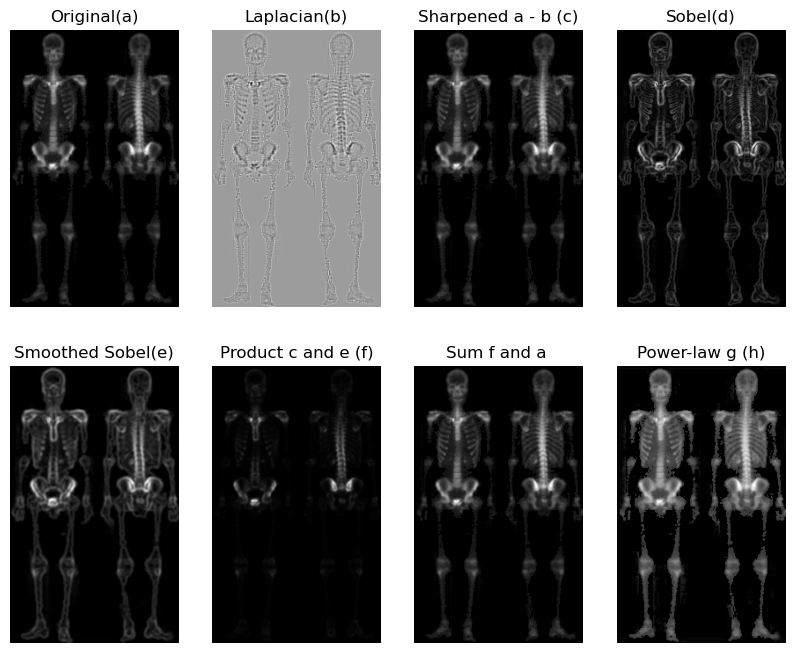

In [115]:
CSEM('./images/xray1.png', 10, 8)

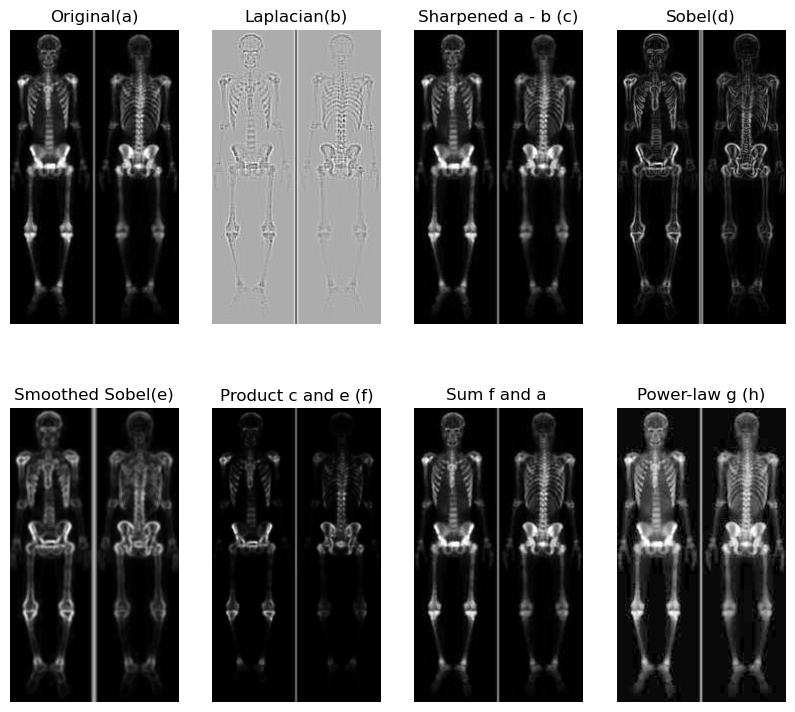

In [116]:
CSEM('./images/xray2.jpg', 10, 9)

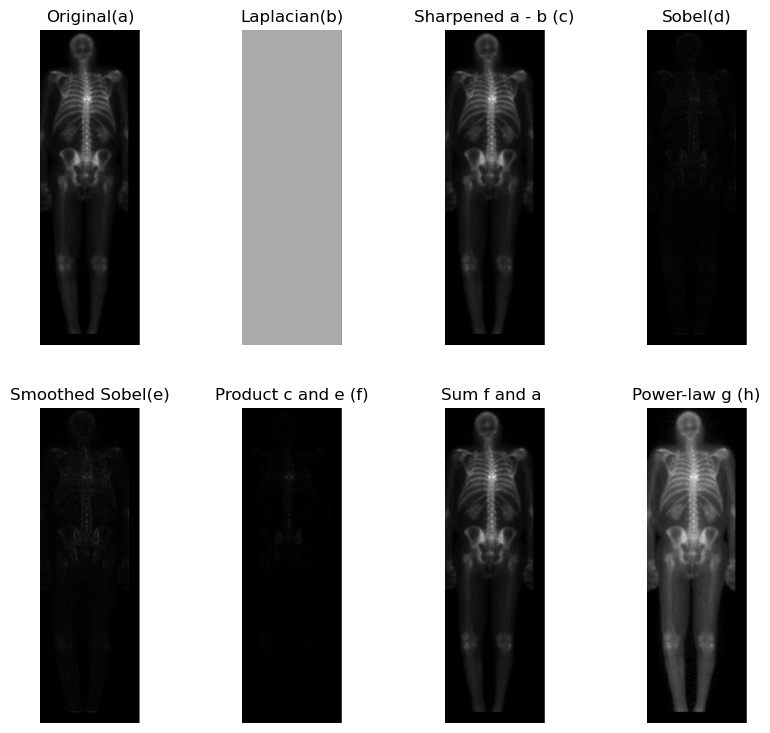

In [117]:
CSEM('./images/xray3.png', 10, 9)

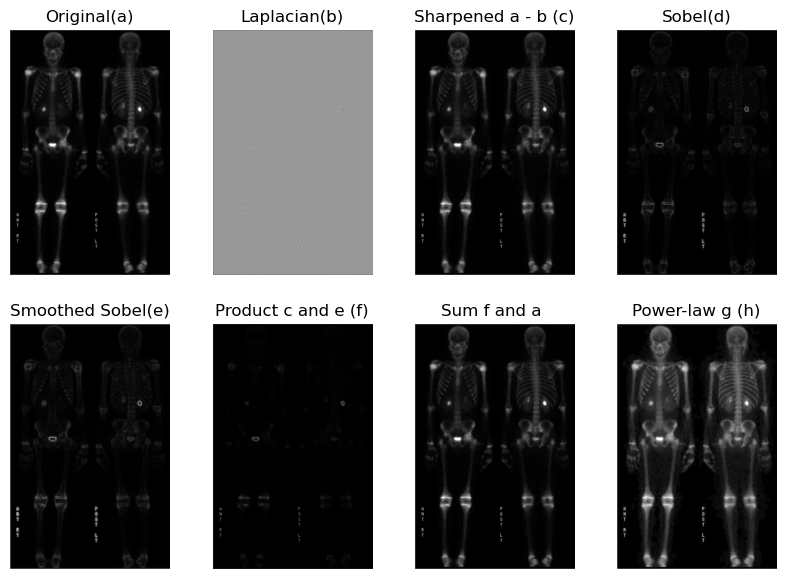

In [118]:
CSEM('./images/xray4.jpg', 10, 7)

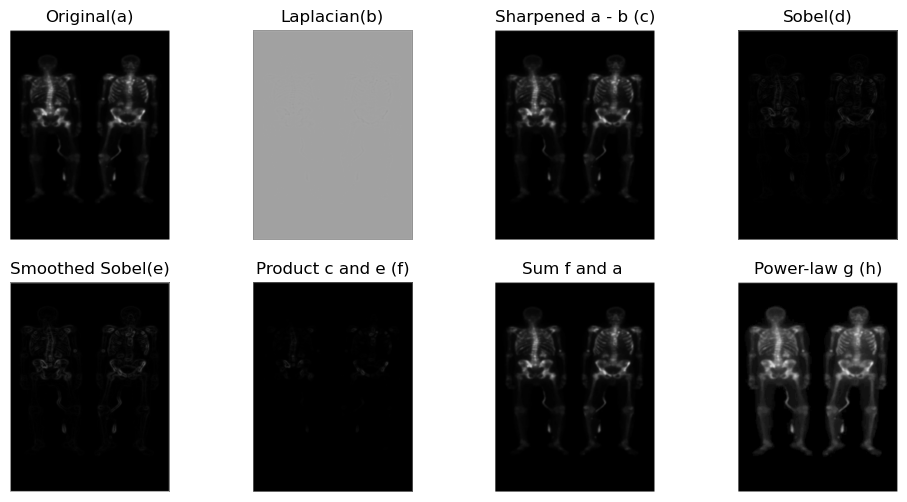

In [119]:
CSEM('./images/xray5.jpg', 12, 6)

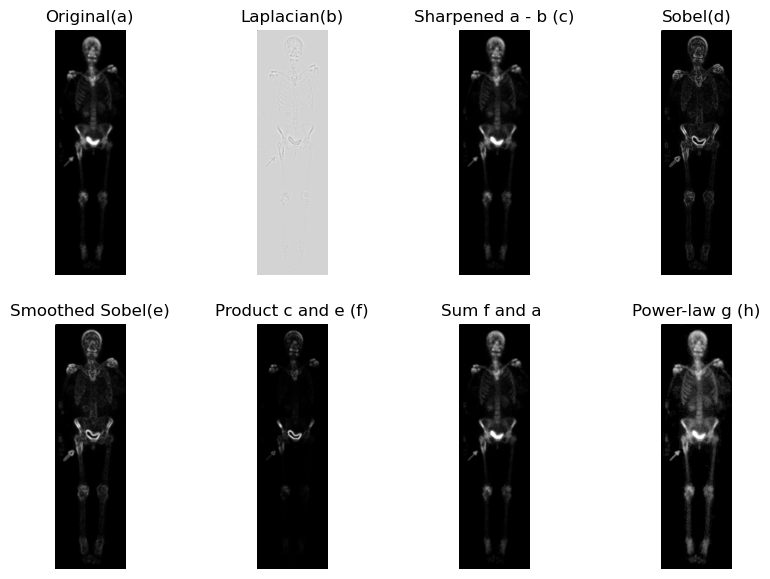

In [120]:
CSEM('./images/xray6.png', 10, 7)